<a href="https://colab.research.google.com/github/Vaycold/Python_ML/blob/main/Clustering/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D%EA%B3%BC%20%EA%B5%B0%EC%A7%91%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Goal
 - Clustering의 다양한 알고리즘
 - 시각화 및 차이점

## Data load & Preprocessing

In [2]:
# importing module
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [6]:
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns = iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
# 컬럼명 재 할당
columns_name_list = ['sepal_length','sepal_width', 'petal_length', 'petal_width']
iris_df.columns = columns_name_list
iris_df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

In [10]:
# 딕셔너리 방법으로도 가능함.

columns_replace_dict = {
    k:v for k,v in zip(iris.feature_names, columns_name_list)
}
iris_df.rename(columns_replace_dict, axis='columns', inplace=True)
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [13]:
# target을 추가해보자.
iris_df['target'] = iris.target

In [14]:
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [15]:
# target의 종류를 확인해보자.
iris_df.target.unique()

array([0, 1, 2])

In [18]:
# 결측값 확인해보자
iris_df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
target          0
dtype: int64

## 데이터 시각화

In [21]:
iris_df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
target            int64
dtype: object

In [22]:
iris_df.describe()

,sepal_length,sepal_width,petal_length,petal_width,target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [27]:
import plotly.express as px

# scatter plot 생성
fig = px.scatter(iris_df, x = 'sepal_length', y='sepal_width')

# 그래프 사이즈 조정
fig.update_layout(width = 600, height=500)

fig.show()


In [28]:
# target은 색깔을 넣어 확인해보자

fig = px.scatter(iris_df, x = 'sepal_length', y='sepal_width', color = 'target')
fig.update_layout(width = 600, height=500)
fig.show()


## Clustering Algorithm

In [29]:
# K-means 
from sklearn.cluster import KMeans

In [30]:
# Train & Test 나누기
X = iris_df.iloc[:, :-1] # 전체의 row와 마지막 column을 제외한 값을 x로
y = iris_df.iloc[:, -1]  # 전체의 row와 마지막 column의 값을 y로 설정

In [35]:
# train : test = 8 : 2
train_x, test_x, train_y, test_y = train_test_split(X, y , test_size = 0.2)

In [36]:
print(train_x.shape)
print(train_y.shape)

(120, 4)
(120,)


In [37]:
# Train module 5개의 그룹으로 clustering을 해보자 (3개인 것을 알지만 모른다는 가정하에 진행)

km  = KMeans(n_clusters=5)
km


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [38]:
# train set으로 훈련
km.fit(train_x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [41]:
# 결과물 확인
clusters_array = km.labels_

In [44]:
# 실제 iris 데이터와 훈련된 cluster의 결과를 비교

compare_clusters = dict(zip(clusters_array, train_y))
    

compare_clusters

{0: 0, 1: 2, 2: 1, 3: 1, 4: 2}

In [45]:
train_x.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

In [48]:
# 훈련된 label을 바탕으로 시각화
fig = px.scatter( x=train_x['petal_width']  ,y=train_x['petal_length'], color = clusters_array)
fig.update_layout(width = 600, height = 500)
fig.show()

In [49]:
# 훈련된 label을 바탕으로 시각화
fig = px.scatter( x=train_x['sepal_length']  ,y=train_x['sepal_width'], color = clusters_array)
fig.update_layout(width = 600, height = 500)
fig.show()

In [50]:
# 최적의 k는 어떻게 구할 까??
km.inertia_  # 이 값은 각 cluster의 중심에서부터 데이터간의 거리를 합한 수치임.
             # 이 값은 최적의 k를 찾는데 사용 될 것임.
             

37.37723886328725

In [53]:
 # elbow method 방법 사용
 k_range = range(1,11)
 distortions = []
 for i in k_range  :
     km = KMeans(n_clusters = i)
     km.fit(train_x)
     distortions.append(km.inertia_.round(2))
print(distortions)

[527.64, 113.61, 61.1, 43.92, 37.36, 31.02, 26.95, 23.92, 21.88, 20.11]


In [54]:
# 이를 그래프로 그린 후 기울기 변화가 가장 작은 지점을 최적의 k로 잡음.
fig = px.line(x = k_range, y=distortions, labels={"x" : "k", "y":"distotrions"})
fig.update_layout(width=800, height = 500)
fig.show()

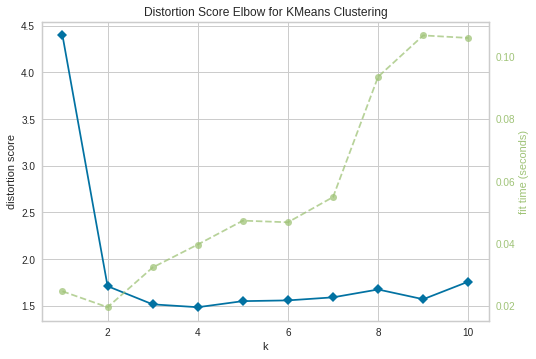

In [61]:
# 최적의 k 찾는 방법(2)
from yellowbrick.cluster import KElbowVisualizer
km = KMeans()
visuailizer = KElbowVisualizer(km, k=(1,11))
visuailizer.fit(train_x)
visuailizer.poof()

In [66]:
# 최적의 k 찾는 방법(3)
# Silhouette method
# - 각 cluster 사이의 거리가 멀고 데이터의 거리가 작을 수록 군집분석 성능이 좋음.
# - silhoutte 값은 -1에서 1사이 
# -1 : clustering의 결과가 좋지않음. 0 : cluster간 변별력이 없음.
from sklearn.metrics import silhouette_score
k_range = range(2, 11)
sil_score = []
for i in k_range  :
     km = KMeans(n_clusters = i)
     km.fit(train_x)
     label = km.predict(train_x)
     sc_value = silhouette_score(np.array(train_x), label, metric = 'euclidean', sample_size =None, random_state=None)
     sil_score.append(sc_value)
sil_score


[0.6855214083898489,
 0.5348917031070598,
 0.49694494788749105,
 0.4895352261989754,
 0.3642075217356683,
 0.35391897382298676,
 0.3356258209351361,
 0.3184086159224177,
 0.3031564093117817]

In [67]:
fig = px.line(x = k_range, y=sil_score, labels={"x" : "k", "y":"silhoutette score"})
fig.update_layout(width=800, height = 500)
fig.show()

In [68]:
# 최적의 k로 k-means model 훈련
k = 3
km = KMeans(n_clusters=3).fit(train_x)
train_cluster = km.labels_
train_cluster

array([2, 0, 2, 0, 2, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 2, 2, 0, 1, 2, 2, 0, 0, 0, 0, 1, 0, 2, 0,
       1, 0, 2, 0, 0, 0, 1, 2, 2, 1, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 2, 2, 1, 1, 2, 0, 2, 0, 2, 0, 1, 2, 2, 1, 0, 2,
       2, 1, 2, 1, 2, 2, 1, 1, 2, 0, 1, 0, 1, 0, 0, 1, 2, 2, 1, 1, 2, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 2], dtype=int32)

In [72]:
# 실제 label과 훈련된 결과 cluster를 그래프로 비교
from plotly.subplots import make_subplots
import plotly.graph_objects as go
fig = make_subplots(rows =1, cols = 2, subplot_titles=('actual', 'k-menas'))
fig.add_trace(
    go.Scatter(x= train_x['sepal_width'],
               y= train_x['sepal_length'],
               mode= 'markers',
               marker = dict(color=train_y )),
              row=1, col=1 
              )
fig.add_trace(
    go.Scatter(x= train_x['sepal_width'],
               y= train_x['sepal_length'],
               mode= 'markers',
               marker = dict(color=train_cluster )),
              row=1, col=2 
              )

fig.update_layout(width= 800,height = 600)
fig.show()

In [73]:
fig = make_subplots(rows =1, cols = 2, subplot_titles=('actual', 'k-menas'))
fig.add_trace(
    go.Scatter(x= train_x['petal_width'],
               y= train_x['petal_length'],
               mode= 'markers',
               marker = dict(color=train_y )),
              row=1, col=1 
              )
fig.add_trace(
    go.Scatter(x= train_x['petal_width'],
               y= train_x['petal_length'],
               mode= 'markers',
               marker = dict(color=train_cluster )),
              row=1, col=2 
              )

fig.update_layout(width= 800,height = 600)
fig.show()